**Анализ сервиса аренды самокатов GoFast**

**Описание проекта**

Вы аналитик популярного сервиса аренды самокатов GoFast. Вам передали данные о некоторых пользователях из нескольких городов, а также об их поездках. Проанализируйте данные и проверьте некоторые гипотезы, которые могут помочь бизнесу вырасти.
Чтобы совершать поездки по городу, пользователи сервиса GoFast пользуются мобильным приложением. 

Сервисом можно пользоваться:

без подписки
абонентская плата отсутствует;
стоимость одной минуты поездки — 
8 рублей;
стоимость старта (начала поездки) — 
50 рублей;

с подпиской Ultra
абонентская плата — 
199 рублей в месяц;
стоимость одной минуты поездки — 
6 рублей;
стоимость старта — бесплатно.


**Описание данных**

Пользователи — users_go.csv

user_id — уникальный идентификатор пользователя
name — имя пользователя
age — возраст
city — город
subscription_type — тип подписки (free, ultra)


Поeздки — rides_go.csv

user_id — уникальный идентификатор пользователя
distance — расстояние, которое пользователь проехал в текущей сессии (в метрах)
duration — продолжительность сессии (в минутах) — время с того момента, как пользователь нажал кнопку «Начать поездку» до момента, как он нажал кнопку «Завершить поездку»
date — дата совершения поездки


Подписки — subscriptions_go.csv

subscription_type — тип подписки
minute_price — стоимость одной минуты поездки по данной подписке
start_ride_price — стоимость начала поездки
subscription_fee — стоимость ежемесячного платежа

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

from scipy import stats as st

#### Шаг 1. Загрузка данных

In [2]:
try:
    data_users_go = pd.read_csv('/datasets/users_go.csv')
except:
    data_users_go = pd.read_csv('https://code.s3.yandex.net/datasets/users_go.csv')

In [3]:
data_users_go.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB


In [4]:
data_users_go.head(5)

,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra


In [5]:
try:
    data_rides_go = pd.read_csv('/datasets/rides_go.csv')
except:
    data_rides_go = pd.read_csv('https://code.s3.yandex.net/datasets/rides_go.csv')

In [6]:
data_rides_go.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB


In [7]:
data_rides_go.head(5)

,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28


In [8]:
try:
    data_subscriptions_go = pd.read_csv('/datasets/subscriptions_go.csv')
except:
    data_subscriptions_go = pd.read_csv('https://code.s3.yandex.net/datasets/subscriptions_go.csv')

In [9]:
data_subscriptions_go.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 192.0+ bytes


In [10]:
data_subscriptions_go.head(5)

,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


#### Шаг 2. Предобработка данных

In [11]:
data_rides_go['date'] = pd.to_datetime(data_rides_go['date'], format = '%Y-%m-%d')

In [12]:
data_rides_go['date'].dt.year.unique()

array([2021])

In [13]:
data_rides_go['month'] = data_rides_go['date'].dt.month

In [14]:
data_rides_go['date'].head(10)

0   2021-01-01
1   2021-01-18
2   2021-04-20
3   2021-08-11
4   2021-08-28
5   2021-10-09
6   2021-10-19
7   2021-11-06
8   2021-11-14
9   2021-11-22
Name: date, dtype: datetime64[ns]

Поиск пропущенных значений и обработка дубликатов

In [15]:
data_users_go.duplicated().sum()

31

In [16]:
data_users_go.drop_duplicates(inplace=True)

In [17]:
data_rides_go.duplicated().sum()

0

In [18]:
data_subscriptions_go.duplicated().sum()

0

#### Шаг 3. Исследовательский анализ данных

Описание и визуализация общей информации о пользователях и поездках:

In [19]:
number_of_cities = data_users_go['city'].value_counts() # частота встречаемости городов
number_of_cities

Пятигорск         219
Екатеринбург      204
Ростов-на-Дону    198
Краснодар         193
Сочи              189
Омск              183
Тюмень            180
Москва            168
Name: city, dtype: int64

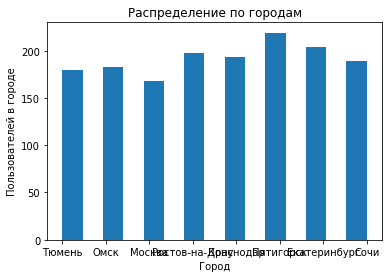

<Figure size 720x720 with 0 Axes>

In [20]:
plt.hist(data_users_go['city'], bins=15)
plt.title('Распределение по городам')
plt.xlabel('Город')
plt.ylabel('Пользователей в городе')
plt.figure(figsize=(10, 10))
plt.show()

Что можно сказать по гистограмме:

Количество пользователей по городам распределено достаточно равномерно. Максимальное количество пользователей в Пятигорске - 219. Меньше всего пользователей в Москве - 168.

In [21]:
subscription_count = data_users_go['subscription_type'].value_counts() # соотношение пользователей с подпиской и без подписки;
subscription_count

free     835
ultra    699
Name: subscription_type, dtype: int64

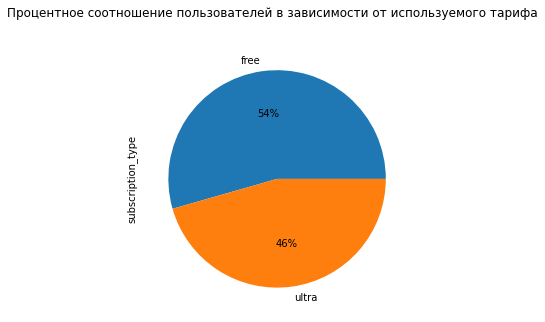

In [22]:
data_users_go['subscription_type'].value_counts().plot(
    subplots=True,
    kind = 'pie', 
    y = subscription_count, 
    autopct = '%1.0f%%', 
    figsize=(5, 5),
    title = 'Процентное соотношение пользователей в зависимости от используемого тарифа');

Пользователей на бесплатной подписке больше - 835 человек это 54% от общего числа пользователей. На платной подписке - 699 пользователей, это - 46%.


In [23]:
data_users_go['age'].sort_values() # возраст пользователей

664     12
66      12
727     12
34      12
235     13
        ..
383     38
804     38
453     38
961     39
1201    43
Name: age, Length: 1534, dtype: int64

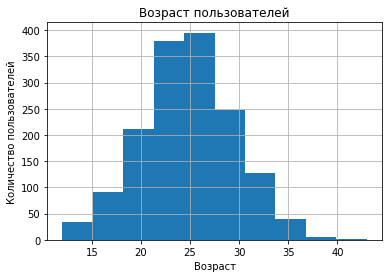

In [24]:
plt.hist(data_users_go['age'])
plt.title('Возраст пользователей')
plt.xlabel('Возраст')
plt.ylabel('Количество пользователей')
plt.grid()
plt.show()

Средний возраст - 25 лет.

In [25]:
data_rides_go['distance'].sort_values()

11555       0.855683
9541        2.570787
13690       4.329506
8658        6.784447
7841        7.097072
            ...     
17242    6724.932981
17171    6760.940067
15580    6908.491343
16484    7066.003772
16309    7211.007745
Name: distance, Length: 18068, dtype: float64

In [26]:
data_rides_go['distance'].describe()

count    18068.000000
mean      3070.659976
std       1116.831209
min          0.855683
25%       2543.226360
50%       3133.609994
75%       3776.222735
max       7211.007745
Name: distance, dtype: float64

In [27]:
round(data_rides_go['distance'].sort_values(), 2) # округление

11555       0.86
9541        2.57
13690       4.33
8658        6.78
7841        7.10
          ...   
17242    6724.93
17171    6760.94
15580    6908.49
16484    7066.00
16309    7211.01
Name: distance, Length: 18068, dtype: float64

Text(0.5, 0, 'Дистанция')

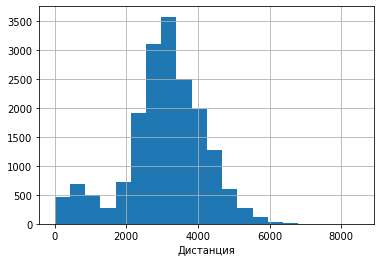

In [28]:
data_rides_go['distance'].hist(bins=20, range = (0, 8500)).set_xlabel('Дистанция')

In [29]:
data_rides_go['duration'].describe()

count    18068.000000
mean        17.805011
std          6.091051
min          0.500000
25%         13.597563
50%         17.678395
75%         21.724800
max         40.823963
Name: duration, dtype: float64

In [30]:
round(data_rides_go['duration'].sort_values(), 2) # округление длительности поездок

12013     0.50
17314     0.50
15029     0.50
7437      0.50
12967     0.50
         ...  
6453     38.27
1998     38.35
2623     39.53
4709     39.87
4215     40.82
Name: duration, Length: 18068, dtype: float64

In [31]:
data_rides_go.groupby(['user_id']).sum(['distance'])

,distance,duration,month
user_id,,,
1,34070.182066,204.604909,99
2,33964.058614,197.644279,67
3,36907.597866,233.193513,66
4,44837.189916,288.563581,107
5,35556.949649,174.073932,51
...,...,...,...
1530,46758.469822,292.366839,104
1531,67054.794222,408.192206,142
1532,33902.203192,212.160144,111


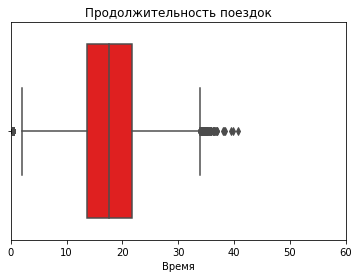

In [32]:
sns.boxplot(x = data_rides_go['duration'], color='red')
plt.title('Продолжительность поездок')
plt.xlabel('Время')
dur = plt.xlim(0, 60)

Text(0.5, 0, 'Продолжительность')

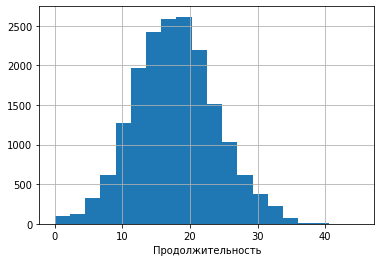

In [33]:
data_rides_go['duration'].hist(bins=20, range = (0, 45)).set_xlabel('Продолжительность')

##### Вывод

Частота встречаемости городов

Количество пользователей по городам распределено достаточно равномерно. Максимальное количество пользователей в Пятигорске - 219. Меньше всего пользователей в Москве - 168.


Соотношение пользователей с подпиской и без подписки

Пользователей на бесплатной подписке больше - 835 человек это 54% от общего числа пользователей. На платной подписке - 699 пользователей, это - 46%.


Возраст пользователей

Основной возраст самокатчиков 25 лет, а основной диапазон от 20 до 30 лет.


Расстояние, которое пользователь преодолел за одну поездку

В основном пользователи проезжают от 2 км до 5 км. Чаще всего около 3 км.


Продолжительность поездок

Основная длительность поездок - 12 - 22 минут.

#### Шаг 4. Объединение данных

In [34]:
complete_data = data_users_go.merge(data_rides_go)
complete_data = complete_data.merge(data_subscriptions_go)
complete_data

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.919140,25.599769,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.592153,15.816871,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.159807,6.232113,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.783254,18.511000,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.687306,26.265803,2021-08-28,8,6,0,199
...,...,...,...,...,...,...,...,...,...,...,...,...
18063,1534,Альберт,25,Краснодар,free,3781.098080,19.822962,2021-11-04,11,8,50,0
18064,1534,Альберт,25,Краснодар,free,2840.423057,21.409799,2021-11-16,11,8,50,0
18065,1534,Альберт,25,Краснодар,free,3826.185507,18.435051,2021-11-18,11,8,50,0
18066,1534,Альберт,25,Краснодар,free,2902.308661,16.674362,2021-11-27,11,8,50,0


In [35]:
free_subscription = complete_data.query("subscription_type == 'free'") # таблица по бесплатным подпискам
free_subscription

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
6500,700,Айдар,22,Омск,free,2515.690719,14.944286,2021-01-02,1,8,50,0
6501,700,Айдар,22,Омск,free,846.932642,16.234663,2021-02-01,2,8,50,0
6502,700,Айдар,22,Омск,free,4004.434142,20.016628,2021-02-04,2,8,50,0
6503,700,Айдар,22,Омск,free,1205.911290,9.782872,2021-02-10,2,8,50,0
6504,700,Айдар,22,Омск,free,3047.379435,17.427673,2021-02-14,2,8,50,0
...,...,...,...,...,...,...,...,...,...,...,...,...
18063,1534,Альберт,25,Краснодар,free,3781.098080,19.822962,2021-11-04,11,8,50,0
18064,1534,Альберт,25,Краснодар,free,2840.423057,21.409799,2021-11-16,11,8,50,0
18065,1534,Альберт,25,Краснодар,free,3826.185507,18.435051,2021-11-18,11,8,50,0
18066,1534,Альберт,25,Краснодар,free,2902.308661,16.674362,2021-11-27,11,8,50,0


In [36]:
ultra_subscription = complete_data.query("subscription_type == 'ultra'") # таблица по платным подпискам
ultra_subscription

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.919140,25.599769,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.592153,15.816871,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.159807,6.232113,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.783254,18.511000,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.687306,26.265803,2021-08-28,8,6,0,199
...,...,...,...,...,...,...,...,...,...,...,...,...
6495,699,Оксана,22,Москва,ultra,3973.046497,24.671163,2021-08-29,8,6,0,199
6496,699,Оксана,22,Москва,ultra,3288.702563,15.892886,2021-09-12,9,6,0,199
6497,699,Оксана,22,Москва,ultra,3076.159348,14.389525,2021-09-26,9,6,0,199
6498,699,Оксана,22,Москва,ultra,4707.845501,15.839579,2021-10-17,10,6,0,199


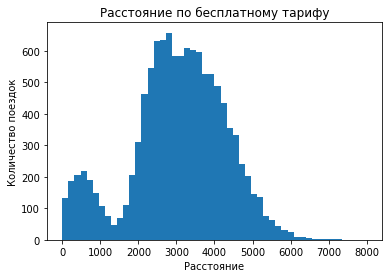

<Figure size 1800x1800 with 0 Axes>

In [37]:
plt.hist(free_subscription['distance'], bins=50, range = (0, 8000))
plt.title('Расстояние по бесплатному тарифу')
plt.xlabel('Расстояние')
plt.ylabel('Количество поездок')
plt.figure(figsize=(25, 25))
plt.show()

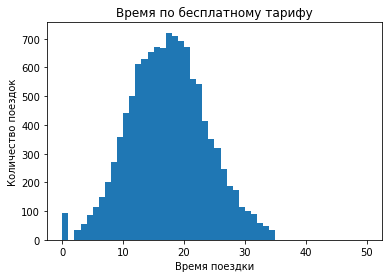

<Figure size 1440x1440 with 0 Axes>

In [38]:
plt.hist(free_subscription['duration'], bins=50, range = (0, 50))
plt.title('Время по бесплатному тарифу')
plt.xlabel('Время поездки')
plt.ylabel('Количество поездок')
plt.figure(figsize=(20, 20))
plt.show()

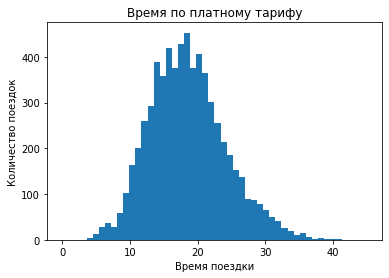

<Figure size 1440x1440 with 0 Axes>

In [39]:
plt.hist(ultra_subscription['duration'], bins=50, range = (0, 45))
plt.title('Время по платному тарифу')
plt.xlabel('Время поездки')
plt.ylabel('Количество поездок')
plt.figure(figsize=(20, 20))
plt.show()

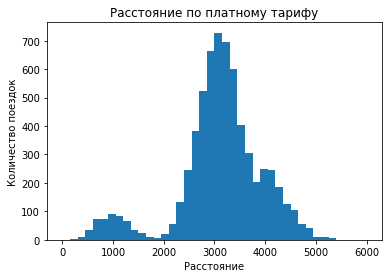

<Figure size 1440x1440 with 0 Axes>

In [40]:
plt.hist(ultra_subscription['distance'], bins=40, range = (0, 6000))
plt.title('Расстояние по платному тарифу')
plt.xlabel('Расстояние')
plt.ylabel('Количество поездок')
plt.figure(figsize=(20, 20))
plt.show()

##### Вывод

Объединили данные о пользователях, поездках и тарифах в один датафрейм - complete_data.

Выделили два датафрейма на основе нового единого датафрейма complete_data:

free_subscription - таблица о пользователях с бесплатным тарифом
ultra_subscription - таблица о пользователях с платным тарифом

Визуализировали информацию о расстоянии и времени для каждого из тарифов.

Бесплатный тариф:
Для бесплатного тарифа время поездки составляет от 10 до 35 минут, и проезжают от 2 до 7 км,

Платный тариф:
Длительность поездок - от 15 до 40 минут, чаще всего около 20 минут. Расстояние - 3км чаще всего, от 2 до 4.5 км самый распространненый диапазон.

Можно сделать вывод, что пользователи с платным тарифом совершают более долгие поездки, но пользователи с бесплатным тарифом проезжают большее расстояние в среднем.

#### Шаг 5. Подсчёт выручки

In [41]:
complete_data['duration'] = np.ceil(complete_data['duration'])

In [42]:
total_data = pd.pivot_table(complete_data,
                           index=['month', 'user_id'],
                           values = ['distance', 'duration', 'name', 'subscription_type'],
                           aggfunc = {'distance': sum, 
                                      'duration' : sum, 
                                      'name' : len, 
                                      'subscription_type' : min})

In [43]:
def calculating_revenue(i): 
    if i['subscription_type'] == 'ultra':
        return 6 * i['duration'] + 199
    elif i['subscription_type'] == 'free':
        return 8 * i['duration'] + 50 * i['name']
    else:
        return 'None'

In [44]:
total_data['monthly_revenue'] = total_data.apply(calculating_revenue, axis=1)

In [45]:
total_data.sort_values(by='month').head(10)

distance  duration  name subscription_type  monthly_revenue
month user_id                                                                 
1     1         7027.511294      42.0     2             ultra            451.0
      1061     12637.249630      43.0     3              free            494.0
      1063      3276.362299      10.0     1              free            130.0
      1064      5297.324649      15.0     1              free            170.0
      1065     14547.099333      99.0     4              free            992.0
      1066      2809.064949      19.0     1              free            202.0
      1067      3864.900780      22.0     1              free            226.0
      1069      7007.076943      53.0     3              free            574.0
      1071      3635.094136      15.0     1              free            170.0
      1072      2498.615999      11.0     1              free            138.0

In [50]:
# Код ревьюера
total_data.groupby('subscription_type')['monthly_revenue'].mean()

subscription_type
free     328.641365
ultra    362.792191
Name: monthly_revenue, dtype: float64

##### Вывод

Создали новый датафрейм с агрегированными данными - revenue_calculation на основе датафрейма с объединенными данными.

Нашли суммарное расстояние, количество поездок и суммарное время для каждого пользователя за каждый месяц. Добавили столбец с помощью функции с помесячной выручкой по пользователям.

#### Шаг 6. Проверка гипотез

##### Важно понять, тратят ли пользователи с подпиской больше времени на поездки? Если да, то пользователи с подпиской могут быть «выгоднее» для компании. Проверьте гипотезу. Используйте исходные данные о продолжительности каждой сессии — отдельно для подписчиков и тех, у кого нет подписки.

Проверка гипотезы: пользователи с подпиской тратят больше времени на поездки, чем пользователи на бесплатном тарифе.

H0: Продолжительность (duration) пользователей с подпиской ultra = время (duration) пользователей с подпиской free

H1: Продолжительность (duration) пользователей с подпиской ultra > время (duration) пользователей с подпиской free

In [46]:
free = free_subscription['duration']
ultra = ultra_subscription['duration'] 

results = st.ttest_ind(ultra, 
                       free,
                       alternative = 'greater')
alpha = 0.05

print(results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не удалось отвергнуть нулевую гипотезу')

1.2804098316645618e-34
Отвергаем нулевую гипотезу


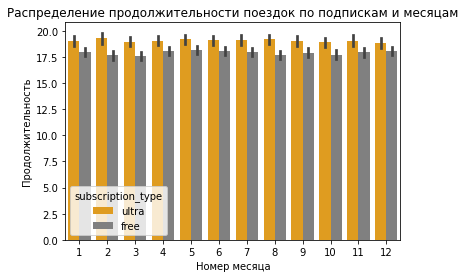

In [47]:
ax = sns.barplot(x = 'month',
            y = 'duration',
            hue = "subscription_type",
            data = complete_data,
            palette = ['orange', 'grey'])
ax.set_title('Распределение продолжительности поездок по подпискам и месяцам')
ax.set(xlabel='Номер месяца', ylabel='Продолжительность');

###### Вывод

Проверили гипотезу, отвергли нулевую гипотезу о том, что время поездки пользователей на тарифе ultra равно времени поездки пользователей на тарифе free

##### Расстояние одной поездки в 3130 метров — оптимальное с точки зрения износа самоката. Можно ли сказать, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров? Проверьте гипотезу и сделайте выводы.

Проверка гипотезы: пользователи с подпиской проезжают расстояние, не превышающее 3130 метров за одну поездку.

H0: Расстояние (distance) пользователей на подписке ultra = 3130 метров

H1: Расстояние (distance) пользователей на подписке ultra > 3130 метров

In [48]:
ultra_distance = ultra_subscription['distance']

interested_value = 3130.0

alpha = 0.05

results = st.ttest_1samp(
    ultra_distance, 
    interested_value,
    alternative = 'greater')
    
print(results.pvalue)

if (results.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не удалось отвергнуть нулевую гипотезу')

0.9195368847849785
Не удалось отвергнуть нулевую гипотезу


###### Вывод

После проверки гипотезы мы не можем утверждать, что расстояние, которое проехали пользователи на тарифе ultra не превышает 3130 метров, что не является оптимальным износом самоката за одну поездку.

##### Проверьте гипотезу о том, будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки. Сделайте вывод.

Проверка гипотезы: помесячная выручка от пользователей с подпиской выше, чем выручка от пользователей без подписки

H0: Выручка (monthly_revenue) пользователей на подписке ultra = выручка (monthly_revenue) пользователей на подписке free

H1: Выручка (monthly_revenue) пользователей на подписке ultra > выручка (monthly_revenue) пользователей на подписке free

In [49]:
ultra_month = total_data.loc[total_data.subscription_type == 'ultra', 'monthly_revenue'] 
free_month = total_data.loc[total_data.subscription_type == 'free', 'monthly_revenue'] 


results = st.ttest_ind(ultra_month, 
                       free_month,
                       alternative = 'greater')

alpha = 0.05

print(results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не удалось отвергнуть нулевую гипотезу')

1.8850394384715216e-31
Отвергаем нулевую гипотезу


###### Вывод

После проверки гипотезу мы можем утверждать, что выручка с пользователей на подписке ultra превышает выручку с пользователей на подписке free

##### Представьте такую ситуацию: техническая команда сервиса обновила сервера, с которыми взаимодействует мобильное приложение. Она надеется, что из-за этого количество обращений в техподдержку значимо снизилось. Некоторый файл содержит для каждого пользователя данные о количестве обращений до обновления и после него. Какой тест вам понадобился бы для проверки этой гипотезы?

В такой задаче логично использовать гипотезу о равенстве средних для зависимых (парных) выборок.

Гипотезы:

H0 : μ1 = μ2

H1 : μ1 != μ2

Где:
μ1 и μ2 - средние значения количество обращений в техподдержку до и после изменения.

scipy.stats.ttest_rel() - нужный метод для сравнения.

##### Общий вывод
Были загружены 3 датафрейма: с пользователями, информацией о поездках, информацией о подписках.

Изменили тип данных у столбца date из датафрейма data_rides_go к типу даты. Добавили столбец month с номером месяца. Были удалены дубликаты строк из датафрейма с пользователями.

В исследовательском анализе данных:

Выявлено:
Количество пользователей по городам распределено достаточно равномерно, без выбросов.
Пользователей, использующих бесплатную подписку больше - 835 человек, что является 54% от общего числа пользователей. На платной подписке сидит 699 пользователей, что соответственно является 46%.
Возраст пользователей - Основной возраст самокатчиков 25 лет, а основной диапазон от 20 до 30 лет.
Расстояние, которое пользователь преодолел за одну поездку - В основном пользователи проезжают от 2 км до 5 км. Чаще всего около 3 км.
Продолжительность поездок - Основная длительность поездок - 12 - 22 минут.

Объединили данные о пользователях, поездках и подписках в один датафрейм. На основе объединенного датафрейма создано еще 2 датафрейма:
Для пользователей с ultra подпиской
Для пользователей с free подпиской
Визуализировали информацию о расстоянии и времени поездки для пользоватей каждого тарифа.

Бесплатный тариф:
Для бесплатного тарифа время поездки составляет от 10 до 35 минут, и проезжают от 2 до 7 км,

Платный тариф:
Длительность поездок - от 15 до 40 минут, чаще всего около 20 минут. Расстояние - 3км чаще всего, от 2 до 4.5 км самый распространненый диапазон.

Сделали вывод, что пользователи с платным тарифом совершают более долгие поездки, но пользователи с бесплатным тарифом проезжают большее расстояние в среднем.

Нашли суммарное расстояние, количество поездок и суммарное время для каждого пользователя за каждый месяц - вывели все данные в отдельный датафрейм complete_data. Добавили в датафрейм complete_data столбец с помесячной выручкой monthly_revenue.

Проверили гипотезы:

Пользователи с подпиской тратят больше времени на поездки, чем пользователи на бесплатном тарифе
Отвергли нулевую гипотезу
Пользователи с подпиской проезжают расстояние, не превышающее 3130 метров за одну поездку
Не удалось отвергнуть нулевую гипотезу
Помесячная выручка от пользователей с подпиской выше, чем выручка от пользователей без подписки
Отвергли нулевую гипотезу